In [ ]:
#Méthodes classiques de Machine Learning comme KNN Imputer et Iterative Imputer.
#Méthodes de Deep Learning comme les autoencodeurs et GANs (réseaux génératifs adverses).

In [ ]:
#telecharger data
import kagglehub
path=kagglehub.dataset_download("mathchi/diabetes-data-set")
print("Path to dataset files:", path)

100%|██████████| 8.91k/8.91k [00:00<00:00, 14.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/mathchi/diabetes-data-set/versions/1


In [1]:
import pandas as pd

#visualiser la data
diabetes=pd.read_csv("/content/diabetes.csv")
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


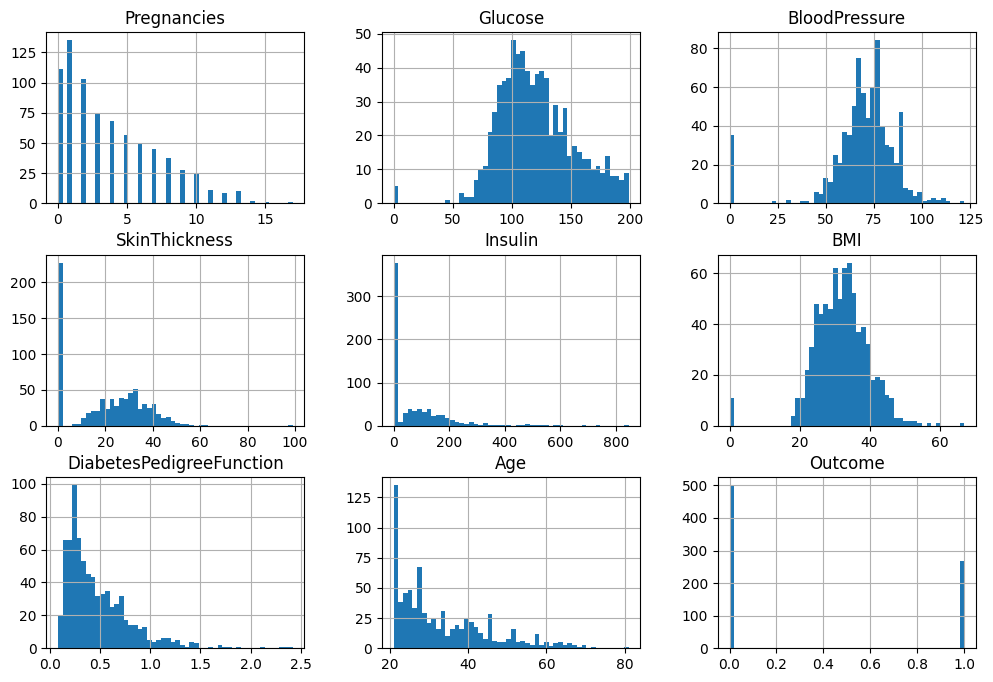

In [4]:
import matplotlib.pyplot as plt
diabetes.hist(bins=50,figsize=(12,8))
plt.show()

In [5]:
#test set
import numpy as np
def introduceMissingValues(df,column_name,ratio):

  column = df[column_name].copy() #copy de la colonne spe
  num_missing_values=int(len(column)*ratio)#Calcul du nombre de valeurs manquantes à insérer
  random_indexes=np.random.choice(column.index,size=num_missing_values,replace=False)#Calcul du nombre de valeurs manquantes à insérer
  df.loc[random_indexes,column_name]=np.nan#Insertion des valeurs manquantes dans les indices choisis




In [6]:
#d.info()
introduceMissingValues(diabetes, "Insulin", ratio=0.1)
introduceMissingValues(diabetes, "Glucose", ratio=0.1)
introduceMissingValues(diabetes, "BloodPressure", ratio=0.1)

diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   692 non-null    float64
 2   BloodPressure             692 non-null    float64
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   692 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


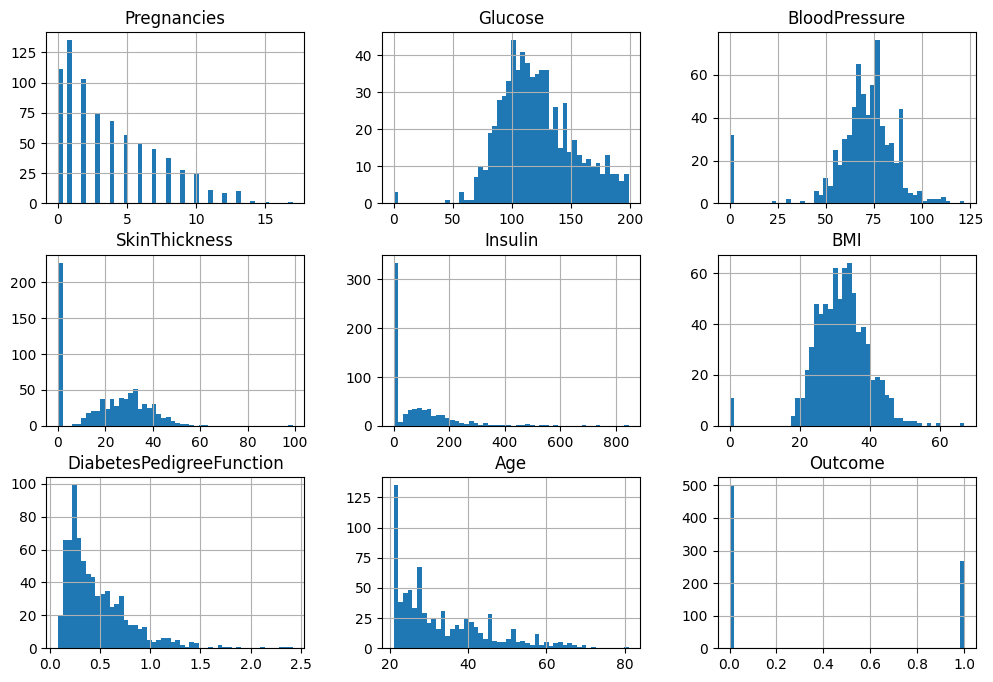

In [7]:
diabetes.hist(bins=50, figsize=(12,8))
plt.show()

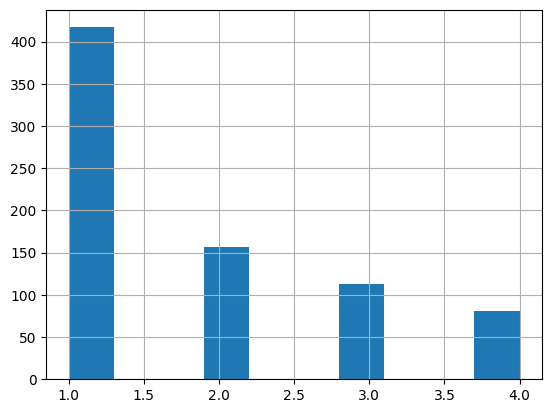

In [8]:
diabetes["Age_cat"] = pd.cut(diabetes["Age"],
                            bins=[20, 30, 40, 50, np.inf],
                            labels=[1, 2, 3, 4])

diabetes.Age_cat.hist()
plt.show()

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(diabetes, test_size=0.1, stratify=diabetes["Age_cat"], random_state=42)

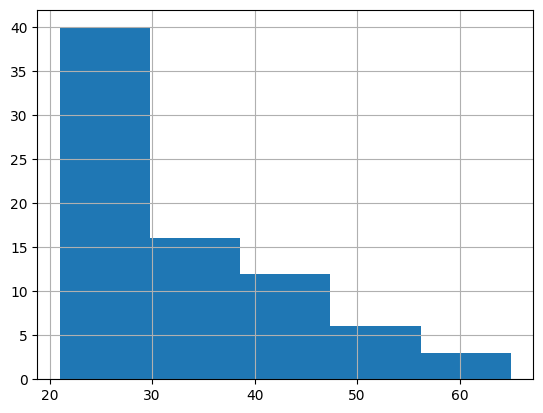

In [10]:
test_set["Age"].hist(bins=5)
plt.show()

In [11]:
# Drop Age_cat column because we won't use it again
for set_ in (train_set, test_set):
    set_.drop("Age_cat", axis=1, inplace=True)

In [12]:
# Make a copy of the original training set we can revert to afterwards
diabetes = train_set.copy()

In [13]:
corr_matrix = diabetes.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129552,0.181534,-0.110236,-0.093906,-0.013255,-0.055854,0.547493,0.197231
Glucose,0.129552,1.000000,0.181314,0.040741,0.358684,0.220624,0.130245,0.253086,0.462708
BloodPressure,0.181534,0.181314,1.000000,0.212825,0.076528,0.324676,0.049146,0.280817,0.104261
SkinThickness,-0.110236,0.040741,0.212825,1.000000,0.457277,0.382308,0.176826,-0.127228,0.056837
Insulin,-0.093906,0.358684,0.076528,0.457277,1.000000,0.209127,0.192117,-0.036750,0.136104
BMI,-0.013255,0.220624,0.324676,0.382308,0.209127,1.000000,0.125896,0.033539,0.291834
DiabetesPedigreeFunction,-0.055854,0.130245,0.049146,0.176826,0.192117,0.125896,1.000000,0.026605,0.166563
Age,0.547493,0.253086,0.280817,-0.127228,-0.036750,0.033539,0.026605,1.000000,0.220255
Outcome,0.197231,0.462708,0.104261,0.056837,0.136104,0.291834,0.166563,0.220255,1.000000


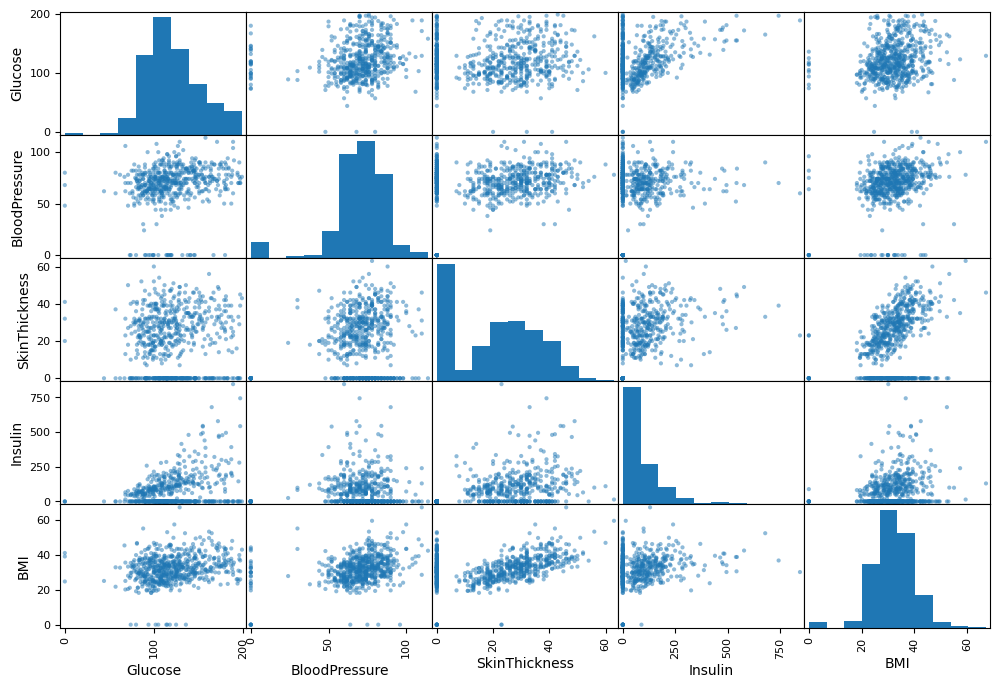

In [14]:
from pandas.plotting import scatter_matrix

attributes = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

scatter_matrix(diabetes[attributes], figsize=(12, 8))
plt.show()

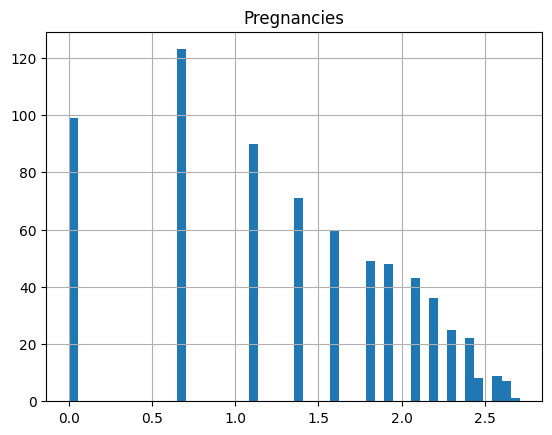

In [15]:
#import matplotlib.pyplot as plt
# TODO : Measure information loss after transformation
pregnancies_transformed = np.log1p(diabetes[["Pregnancies"]])
pregnancies_transformed.hist(bins=50)
plt.show()

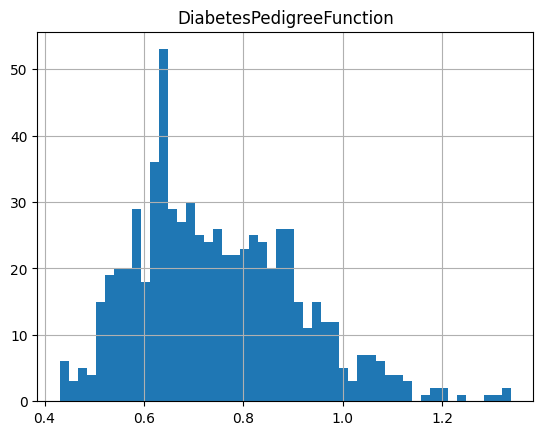

In [16]:
diabetesPedigreeFunction_transformed = np.power(diabetes[["DiabetesPedigreeFunction"]], 0.33)
diabetesPedigreeFunction_transformed.hist(bins=50)
plt.show()

<Axes: ylabel='Count'>

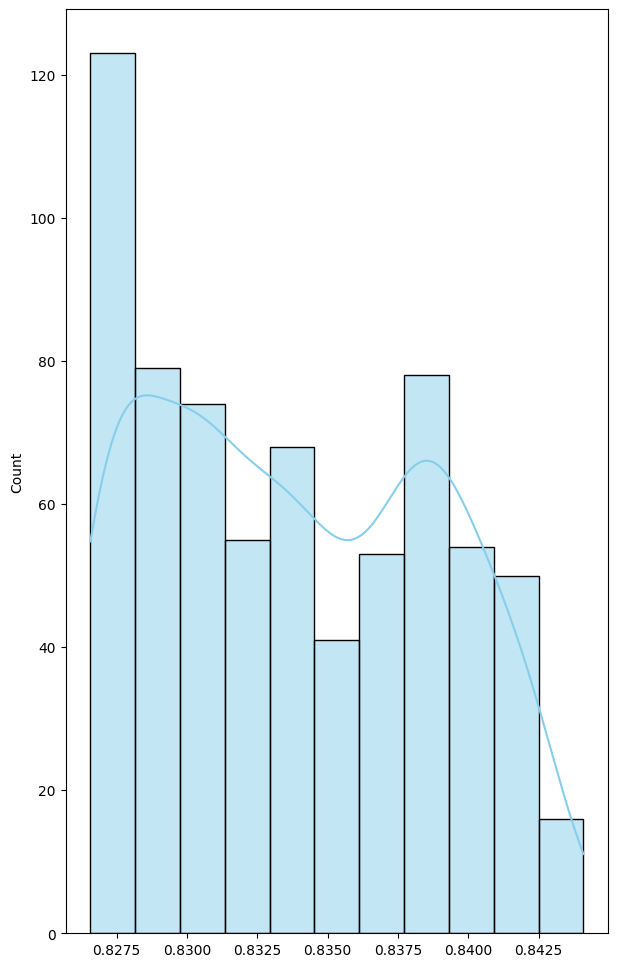

In [17]:
from scipy.stats import boxcox
import seaborn as sns

age_transformed, _ = boxcox(diabetes.Age + 1)
plt.figure(figsize=(7, 12))
sns.histplot(age_transformed, kde=True, color="skyblue")


In [18]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
diabetes_scaled = std_scaler.fit_transform(diabetes)

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Exemple de DataFrame avec des valeurs manquantes
np.random.seed(42)
diabetes = pd.DataFrame({
    "Pregnancies": np.random.randint(0, 10, 100),
    "DiabetesPedigreeFunction": np.random.rand(100),
    "Age": np.random.randint(21, 60, 100),
    "Outcome": np.random.randint(0, 2, 100)  # Variable cible
})
diabetes.loc[np.random.choice(diabetes.index, 10), "Pregnancies"] = np.nan
diabetes.loc[np.random.choice(diabetes.index, 15), "DiabetesPedigreeFunction"] = np.nan
diabetes.loc[np.random.choice(diabetes.index, 5), "Age"] = np.nan

# Diviser les données en features et target
X = diabetes.drop(columns=["Outcome"])
y = diabetes["Outcome"]

# Définir les transformations des colonnes spécifiques avec indices
transformers = [
    ("pregnancies_log", FunctionTransformer(np.log1p), [0]),  # Colonne 0 : Pregnancies
    ("diabetes_pedigree_cbrt", FunctionTransformer(lambda x: np.power(x, 0.33)), [1]),  # Colonne 1 : DiabetesPedigreeFunction
    ("age_boxcox", PowerTransformer(method='box-cox'), [2])  # Colonne 2 : Age
]

# Pipeline des transformations
column_transformer = ColumnTransformer(
    transformers=transformers,
    remainder='passthrough'  # Conserver les autres colonnes
)

# Construire le pipeline complet
pipeline = Pipeline([
    ("column_transform", column_transformer),  # Transformations spécifiques
    ("scaler", StandardScaler()),              # Normalisation
    ("imputer", KNNImputer())                   # Imputation des valeurs manquantes avec KNN
])

# Définir la grille des hyperparamètres pour KNNImputer
param_distributions = {
    "imputer__n_neighbors": [3, 5, 7],
    "imputer__weights": ["uniform", "distance"],
    "imputer__metric": ["nan_euclidean"],  # Seul 'nan_euclidean' est valide
    "imputer__missing_values": [np.nan]
}

# Instancier RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=6,      # Nombre réduit d'itérations pour plus d'efficacité
    scoring="neg_mean_squared_error",  # Utiliser l'erreur quadratique moyenne
    cv=5,           # Validation croisée 5-fold pour éviter overfitting
    random_state=42,
    n_jobs=-1       # Utiliser tous les cœurs disponibles
)

# Effectuer la recherche hyperparamétrique
random_search.fit(X, y)  # Appliquer fit(X, y) pour ajuster les hyperparamètres

# Meilleurs paramètres trouvés
print("Best Parameters:", random_search.best_params_)

# Appliquer la transformation pour l'imputation sur X
X_imputed = random_search.best_estimator_.named_steps["imputer"].transform(X)




Best Parameters: {'imputer__weights': 'uniform', 'imputer__n_neighbors': 3, 'imputer__missing_values': nan, 'imputer__metric': 'nan_euclidean'}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but KNNImputer was fitted without feature names
  warnings.warn(


In [ ]:
"""from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Exemple de DataFrame avec des valeurs manquantes
np.random.seed(42)
diabetes = pd.DataFrame({
    "Pregnancies": np.random.randint(0, 10, 100),
    "DiabetesPedigreeFunction": np.random.rand(100),
    "Age": np.random.randint(21, 60, 100),
    "Outcome": np.random.randint(0, 2, 100)  # Variable cible
})
diabetes.loc[np.random.choice(diabetes.index, 10), "Pregnancies"] = np.nan
diabetes.loc[np.random.choice(diabetes.index, 15), "DiabetesPedigreeFunction"] = np.nan
diabetes.loc[np.random.choice(diabetes.index, 5), "Age"] = np.nan

# Diviser les données en features et target
X = diabetes.drop(columns=["Outcome"])
y = diabetes["Outcome"]

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir les transformations des colonnes spécifiques avec indices
transformers = [
    ("pregnancies_log", FunctionTransformer(np.log1p), [0]),  # Colonne 0 : Pregnancies
    ("diabetes_pedigree_cbrt", FunctionTransformer(lambda x: np.power(x, 0.33)), [1]),  # Colonne 1 : DiabetesPedigreeFunction
    ("age_boxcox", PowerTransformer(method='box-cox'), [2])  # Colonne 2 : Age
]

# Pipeline des transformations
column_transformer = ColumnTransformer(
    transformers=transformers,
    remainder='passthrough'  # Conserver les autres colonnes
)

# Construire le pipeline complet
pipeline = Pipeline([
    ("column_transform", column_transformer),  # Transformations spécifiques
    ("scaler", StandardScaler()),              # Normalisation
    ("imputer", KNNImputer())                   # Imputation des valeurs manquantes avec KNN
])

# Définir la grille des hyperparamètres pour KNNImputer
param_distributions = {
    "imputer__n_neighbors": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "imputer__weights": ["uniform", "distance"],
    "imputer__metric": ["nan_euclidean"],  # Seul 'nan_euclidean' est valide
    "imputer__missing_values": [np.nan]
}

# Instancier RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=20,      # Augmenter le nombre d'itérations pour une meilleure recherche
    scoring="neg_mean_squared_error",  # Utiliser l'erreur quadratique moyenne
    cv=10,           # Augmenter le nombre de folds pour une meilleure validation
    random_state=42,
    n_jobs=-1       # Utiliser tous les cœurs disponibles
)

# Effectuer la recherche hyperparamétrique
random_search.fit(X_train, y_train)  # Appliquer fit(X, y) pour ajuster les hyperparamètres

# Meilleurs paramètres trouvés
print("Best Parameters:", random_search.best_params_)

# Appliquer la transformation et l'imputation
X_test_imputed = random_search.best_estimator_.transform(X_test)

# Vérifier les formes des données
print("\nForme de X_test:", X_test.shape)
print("Forme de X_test_imputed:", X_test_imputed.shape)

# Convertir X_test_imputed en DataFrame pour faciliter la comparaison
X_test_imputed_df = pd.DataFrame(
    X_test_imputed,
    columns=X_test.columns,
    index=X_test.index
)

# Comparer les données originales et imputées colonne par colonne
for col in X_test.columns:
    print(f"\nComparaison pour la colonne {col}")
    print("Valeurs originales - Description statistique:")
    print(X_test[col].describe())
    print("\nValeurs imputées - Description statistique:")
    print(X_test_imputed_df[col].describe())

    # Calculer le RMSE pour cette colonne
    rmse = np.sqrt(mean_squared_error(
        X_test[col].fillna(X_test[col].mean()),
        X_test_imputed_df[col]
    ))
    print(f"RMSE pour {col}: {rmse}")"""

'from sklearn.impute import KNNImputer\nfrom sklearn.compose import ColumnTransformer\nfrom sklearn.preprocessing import FunctionTransformer, PowerTransformer, StandardScaler\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.model_selection import RandomizedSearchCV, train_test_split\nfrom sklearn.metrics import mean_squared_error\nimport numpy as np\nimport pandas as pd\n\n# Exemple de DataFrame avec des valeurs manquantes\nnp.random.seed(42)\ndiabetes = pd.DataFrame({\n    "Pregnancies": np.random.randint(0, 10, 100),\n    "DiabetesPedigreeFunction": np.random.rand(100),\n    "Age": np.random.randint(21, 60, 100),\n    "Outcome": np.random.randint(0, 2, 100)  # Variable cible\n})\ndiabetes.loc[np.random.choice(diabetes.index, 10), "Pregnancies"] = np.nan\ndiabetes.loc[np.random.choice(diabetes.index, 15), "DiabetesPedigreeFunction"] = np.nan\ndiabetes.loc[np.random.choice(diabetes.index, 5), "Age"] = np.nan\n\n# Diviser les données en features et target\nX = diabetes.drop(columns=

In [ ]:
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, PowerTransformer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Exemple de DataFrame avec des valeurs manquantes
np.random.seed(42)
diabetes = pd.DataFrame({
    "Pregnancies": np.random.randint(0, 10, 100),
    "DiabetesPedigreeFunction": np.random.rand(100),
    "Age": np.random.randint(21, 60, 100),
    "Outcome": np.random.randint(0, 2, 100)  # Variable cible
})
diabetes.loc[np.random.choice(diabetes.index, 10), "Pregnancies"] = np.nan
diabetes.loc[np.random.choice(diabetes.index, 15), "DiabetesPedigreeFunction"] = np.nan
diabetes.loc[np.random.choice(diabetes.index, 5), "Age"] = np.nan

# Diviser les données en features et target
X = diabetes.drop(columns=["Outcome"])
y = diabetes["Outcome"]

# Définir les transformations des colonnes spécifiques avec indices
transformers = [
    ("pregnancies_log", FunctionTransformer(np.log1p), [0]),  # Colonne 0 : Pregnancies
    ("diabetes_pedigree_cbrt", FunctionTransformer(lambda x: np.power(x, 0.33)), [1]),  # Colonne 1 : DiabetesPedigreeFunction
    ("age_boxcox", PowerTransformer(method='box-cox'), [2])  # Colonne 2 : Age
]

# Pipeline des transformations
column_transformer = ColumnTransformer(
    transformers=transformers,
    remainder='passthrough'  # Conserver les autres colonnes
)

# Construire le pipeline complet
pipeline = Pipeline([
    ("column_transform", column_transformer),  # Transformations spécifiques
    ("scaler", StandardScaler()),              # Normalisation
    ("imputer", KNNImputer())                   # Imputation des valeurs manquantes avec KNN
])

# Définir la grille des hyperparamètres pour KNNImputer
param_distributions = {
    "imputer__n_neighbors": [3, 5, 7],
    "imputer__weights": ["uniform", "distance"],
    "imputer__metric": ["nan_euclidean"],  # Seul 'nan_euclidean' est valide
    "imputer__missing_values": [np.nan]
}

# Instancier RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_distributions,
    n_iter=6,      # Nombre réduit d'itérations pour plus d'efficacité
    scoring="neg_mean_squared_error",  # Utiliser l'erreur quadratique moyenne
    cv=5,           # Validation croisée 5-fold pour éviter overfitting
    random_state=42,
    n_jobs=-1       # Utiliser tous les cœurs disponibles
)

# Effectuer la recherche hyperparamétrique
random_search.fit(X, y)  # Appliquer fit(X, y) pour ajuster les hyperparamètres

# Meilleurs paramètres trouvés
print("Best Parameters:", random_search.best_params_)

# Créer un imputeur avec les meilleurs paramètres
best_imputer = KNNImputer(
    n_neighbors=random_search.best_params_['imputer__n_neighbors'],
    weights=random_search.best_params_['imputer__weights'],
    metric=random_search.best_params_['imputer__metric']
)

# Imputer les données
X_imputed = best_imputer.fit_transform(X)

# Convertir X_imputed en DataFrame avec les mêmes colonnes que X
X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns, index=X.index)

# Calculer le RMSE par colonne en ignorant les NaN
print("\nRMSE par colonne :")
for col in X.columns:
    # Créer des masques pour les valeurs non-NaN originales
    mask = ~X[col].isna()

    # Calculer le RMSE uniquement sur les valeurs non-NaN
    rmse_col = np.sqrt(mean_squared_error(
        X.loc[mask, col],
        X_imputed_df.loc[mask, col]
    ))
    print(f"{col}: {rmse_col}")

# Afficher un résumé comparatif
print("\nComparaison des statistiques descriptives :")
print("Données originales :")
print(X.describe())
print("\nDonnées imputées :")
print(X_imputed_df.describe())

Best Parameters: {'imputer__weights': 'uniform', 'imputer__n_neighbors': 3, 'imputer__missing_values': nan, 'imputer__metric': 'nan_euclidean'}

RMSE par colonne :
Pregnancies: 0.0
DiabetesPedigreeFunction: 0.0
Age: 0.0

Comparaison des statistiques descriptives :
Données originales :
       Pregnancies  DiabetesPedigreeFunction        Age
count    91.000000                 86.000000  95.000000
mean      4.868132                  0.486507  42.600000
std       2.906731                  0.275693  11.018746
min       0.000000                  0.000520  21.000000
25%       2.000000                  0.254454  36.000000
50%       5.000000                  0.463418  44.000000
75%       7.000000                  0.695739  52.500000
max       9.000000                  0.997740  58.000000

Données imputées :
       Pregnancies  DiabetesPedigreeFunction         Age
count   100.000000                100.000000  100.000000
mean      4.893333                  0.478771   42.530000
std       2.792438 

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan]
  warnings.warn(
